<a href="https://colab.research.google.com/github/stav-aizik/AI-PROJECT/blob/main/Final_project_TSLA_stav_aizik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#download data(tesla)
tsla = yf.download("TSLA",start="2022-07-04",end="2023-07-04")
tsla.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [16]:
#download elon musk tweets dataset
#"https://drive.google.com/file/d/154mg0W1alcEW_1DW4XyVKjBfU26FmTf6/view?usp=drive_link"
#https://www.kaggle.com/datasets/gpreda/elon-musk-tweets?resource=download
!gdown --fuzzy "https://drive.google.com/file/d/154mg0W1alcEW_1DW4XyVKjBfU26FmTf6/view?usp=sharing" -O elon_musk_tweets.zip
#unzip
!unzip elon_musk_tweets.zip -d elon_musk_tweets

Downloading...
From: https://drive.google.com/uc?id=154mg0W1alcEW_1DW4XyVKjBfU26FmTf6
To: /content/elon_musk_tweets.zip
100% 378k/378k [00:00<00:00, 76.0MB/s]
Archive:  elon_musk_tweets.zip
replace elon_musk_tweets/elon_musk_tweets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [18]:
#read csv elon musk tweets
df=pd.read_csv("/content/elon_musk_tweets/elon_musk_tweets.csv")

View the information I will work with

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5904 non-null   int64 
 1   user_name         5904 non-null   object
 2   user_location     1050 non-null   object
 3   user_description  1422 non-null   object
 4   user_created      5904 non-null   object
 5   user_followers    5904 non-null   int64 
 6   user_friends      5904 non-null   int64 
 7   user_favourites   5904 non-null   int64 
 8   user_verified     5904 non-null   bool  
 9   date              5904 non-null   object
 10  text              5904 non-null   object
 11  hashtags          2 non-null      object
 12  source            5904 non-null   object
 13  retweets          5904 non-null   int64 
 14  favorites         5904 non-null   int64 
 15  is_retweet        5904 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 657.4+ KB


In [20]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1544379368478212100,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitabl...,NaN,Twitter for iPhone,335,6542,False
1,1544377493263720450,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:47:42+00:00,"Sock Con, the conference for socks",NaN,Twitter for iPhone,1451,30753,False
2,1544377130590552064,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:46:15+00:00,Always something new for the magazine cover an...,NaN,Twitter for iPhone,1284,28610,False
3,1544375575724400645,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:40:05+00:00,@ExplainThisBob This guy gets it,NaN,Twitter for iPhone,131,3640,False
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False


In [7]:
print(df["user_verified"].unique())

[ True False]


In [8]:
print((df["user_verified"]==False).sum())

1837


In [21]:
df.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
5899,1665143503108677634,Elon Musk,NaN,NaN,2009-06-02 20:12:29+00:00,143325985,330,25655,False,2023-06-03 23:48:42+00:00,@JonErlichman He’s not wrong …,NaN,Twitter for iPhone,361,4791,False
5900,1665139144425631747,Elon Musk,NaN,NaN,2009-06-02 20:12:29+00:00,143325985,330,25655,False,2023-06-03 23:31:23+00:00,"@alifarhat79 Guys, I think I maybe took too mu...",NaN,Twitter for iPhone,1609,61964,False
5901,1665137204782419968,Elon Musk,NaN,NaN,2009-06-02 20:12:29+00:00,143325985,330,25655,False,2023-06-03 23:23:41+00:00,@sriramk Cool,NaN,Twitter for iPhone,46,879,False
5902,1665131126900285445,Elon Musk,NaN,NaN,2009-06-02 20:12:29+00:00,143325985,330,25655,False,2023-06-03 22:59:31+00:00,@cb_doge Time to complete the circle,NaN,Twitter for iPhone,898,12467,False
5903,1665121551652474880,Elon Musk,NaN,NaN,2009-06-02 20:12:29+00:00,143325985,330,25655,False,2023-06-03 22:21:29+00:00,@Jason Late stage civilization complacency,NaN,Twitter for iPhone,1997,38113,False


In [8]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        251 non-null    datetime64[ns]
 1   (Close, TSLA)   251 non-null    float64       
 2   (High, TSLA)    251 non-null    float64       
 3   (Low, TSLA)     251 non-null    float64       
 4   (Open, TSLA)    251 non-null    float64       
 5   (Volume, TSLA)  251 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.9 KB


In [9]:
tsla.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2022-07-05,233.066666,233.146667,216.166672,223.000000,84581100
1,2022-07-06,231.733337,234.563339,227.186661,230.779999,71853600
2,2022-07-07,244.543335,245.363327,232.210007,233.919998,81930600
3,2022-07-08,250.763336,254.979996,241.160004,242.333328,101854200
4,2022-07-11,234.343338,253.063339,233.626663,252.103333,99241200


In [10]:
tsla.tail()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
246,2023-06-27,250.210007,250.389999,240.850006,243.240005,164968200
247,2023-06-28,256.239990,259.880005,248.889999,249.699997,159770800
248,2023-06-29,257.500000,260.739990,253.610001,258.029999,131283400
249,2023-06-30,261.769989,264.450012,259.890015,260.600006,112267600
250,2023-07-03,279.820007,284.250000,275.109985,276.489990,119685900


In [11]:
tsla.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

Pre-processing

In [22]:
#Changing the date data type
df["date"] = pd.to_datetime(df["date"])
tsla["date"]=pd.to_datetime(tsla["Date"])

In [23]:
#new table
tweets= df[["date","user_followers","text"]]

In [24]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   date            5904 non-null   datetime64[ns, UTC]
 1   user_followers  5904 non-null   int64              
 2   text            5904 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 138.5+ KB


In [25]:
tweets.head()

,date,user_followers,text
0,2022-07-05 17:55:09+00:00,101240855,@BillyM2k I find the gold toe sock – inevitabl...
1,2022-07-05 17:47:42+00:00,101240806,"Sock Con, the conference for socks"
2,2022-07-05 17:46:15+00:00,101240806,Always something new for the magazine cover an...
3,2022-07-05 17:40:05+00:00,101240806,@ExplainThisBob This guy gets it
4,2022-07-05 17:38:23+00:00,101240806,Sock tech is so advanced that you can get pret...


In [15]:
#tsla.columns=tsla.columns.get_level_values(0)

In [32]:
tsla.columns = [col[0] for col in tsla.columns]

In [33]:
tsla.head()

,Date,Close,High,Low,Open,Volume
0,2019-01-02,20.674667,21.008667,19.920000,20.406668,174879000
1,2019-01-03,20.024000,20.626667,19.825333,20.466667,104478000
2,2019-01-04,21.179333,21.200001,20.181999,20.400000,110911500
3,2019-01-07,22.330667,22.449333,21.183332,21.448000,113268000
4,2019-01-08,22.356667,22.934000,21.801332,22.797333,105127500


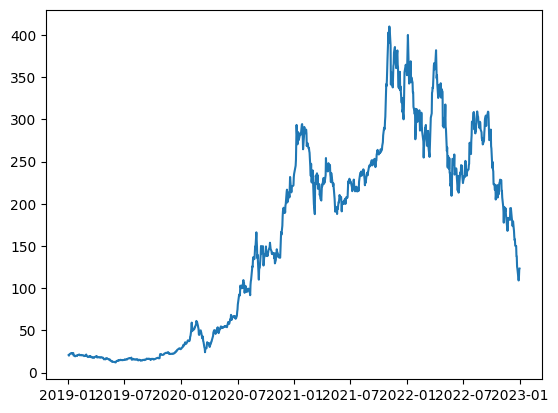

In [34]:
plt.plot(tsla["Date"], tsla["Close"])

In [35]:
pd.concat([tsla["Close"],
          tsla["Close"].shift(-1),
          tsla["Close"].shift(+1)],
          keys = ["Close","TMW","Yesterdy"],axis=1).head()

,Close,TMW,Yesterdy
0,20.674667,20.024000,NaN
1,20.024000,21.179333,20.674667
2,21.179333,22.330667,20.024000
3,22.330667,22.356667,21.179333
4,22.356667,22.568666,22.330667


In [36]:
tsla["Close Change"] = (tsla["Close"].shift(-1) - tsla["Close"])

In [37]:
tsla.head()

,Date,Close,High,Low,Open,Volume,Close Change
0,2019-01-02,20.674667,21.008667,19.920000,20.406668,174879000,-0.650667
1,2019-01-03,20.024000,20.626667,19.825333,20.466667,104478000,1.155333
2,2019-01-04,21.179333,21.200001,20.181999,20.400000,110911500,1.151335
3,2019-01-07,22.330667,22.449333,21.183332,21.448000,113268000,0.025999
4,2019-01-08,22.356667,22.934000,21.801332,22.797333,105127500,0.212000


In [39]:
tsla.loc[tsla["Close Change"]>0,"lable"]=1
tsla.loc[tsla["Close Change"]<0,"lable"] = -1

In [40]:
tsla

,Date,Close,High,Low,Open,Volume,Close Change,lable
0,2019-01-02,20.674667,21.008667,19.920000,20.406668,174879000,-0.650667,-1.0
1,2019-01-03,20.024000,20.626667,19.825333,20.466667,104478000,1.155333,1.0
2,2019-01-04,21.179333,21.200001,20.181999,20.400000,110911500,1.151335,1.0
3,2019-01-07,22.330667,22.449333,21.183332,21.448000,113268000,0.025999,1.0
4,2019-01-08,22.356667,22.934000,21.801332,22.797333,105127500,0.212000,1.0
...,...,...,...,...,...,...,...,...
1003,2022-12-23,123.150002,128.619995,121.019997,126.370003,166989700,-14.050003,-1.0
1004,2022-12-27,109.099998,119.669998,108.760002,117.500000,208643400,3.610001,1.0
1005,2022-12-28,112.709999,116.269997,108.239998,110.349998,221070500,9.110001,1.0
1006,2022-12-29,121.820000,123.570000,117.500000,120.389999,221923300,1.360001,1.0


In [38]:
#"https://drive.google.com/file/d/154mg0W1alcEW_1DW4XyVKjBfU26FmTf6/view?usp=drive_link"
#https://www.kaggle.com/datasets/gpreda/elon-musk-tweets?resource=download
